In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))
from rubiks.Datamanip import *
from rubiks.Plotter import *
print("Import success")

Import success


In [2]:
dfLinear = pd.read_csv('../data/linear.csv')
dfLogistic = pd.read_csv('../data/logistic.csv')

x1 = dfLinear['ps']
y1 = dfLinear['fs']

x2 = dfLogistic['value']
y2 = dfLogistic['status']

print(dfLinear)
print("\n", dfLogistic)

    ps  fs
0   90  93
1   87  88
2  100  98
3   78  78
4   75  76
5   74  76
6   70  69
7   50  60
8   20  10
9   12  10

    value  status
0     90       1
1     87       1
2    100       1
3     78       1
4     75       1
5     74       0
6     70       0
7     50       0
8     20       0


In [3]:
x_train1, y_train1, x_test1, y_test1 = splitData(
    x1, y1, test_size=0.2, random_state=1)

print("Splitting Success")

Splitting Success


In [4]:
from rubiks.Regression import *

modelLin = LinearRegression(x=x_train1, y=y_train1)
weightLin, biasLin = modelLin.fit(lr=0.0001, epoch=2000)

weightLin = weightLin
biasLin = biasLin

print(f"Weight:\n{weightLin}")
print(f"Bias:\n{biasLin}")
modelformula = modelLin.showFormula()

D:\projects\mathml\rubiks\Regression.py:64: SyntaxWarning: invalid escape sequence '\c'
  display(Math(f'f(x) = {self.weight:.4f} \cdot x + {self.bias:.4f}'))


Weight:
1.0229258470482998
Bias:
-0.22443007450043487
Model:


<IPython.core.display.Math object>

Formulas:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
ypred = round(modelLin.predict(x_test1), 2)
print(f"Data: {x_test1.values}:\n{ypred}True:{y_test1.values}")
MSEC = MSE(ypred, y_test1)
print(f"MSE: {MSEC}")

Data: [100  12]:
2    102.07
9     12.05
Name: ps, dtype: float64True:[98 10]
2    102.07
9     12.05
Name: ps, dtype: float64 - 2    98
9    10
Name: fs, dtype: int64 = 2    4.07
9    2.05
dtype: float64
Error^2 = 2    16.5649
9     4.2025
dtype: float64
MSE: 10.383699999999974


In [6]:
modelLog = LogisticRegression(x=x2, y=y2)
weightLog, biasLog = modelLog.fit(lr=0.001, epoch=3000)

weightLog = (weightLog)
biasLog = (biasLog)

print(f"Weight:\n{weightLog}")
print(f"Bias:\n{biasLog}")

Weight:
0.012551092893501238
Bias:
-0.28292398758257115


In [7]:
%load_ext autoreload
%autoreload 2
input = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
for n in input:
    ypred = round(modelLog.predict(n).item(), 3)
    print(f"Input {n}:\nPredict: {ypred}")

Input 10:
Predict: 0.461
Input 20:
Predict: 0.492
Input 30:
Predict: 0.523
Input 40:
Predict: 0.555
Input 50:
Predict: 0.585
Input 60:
Predict: 0.615
Input 70:
Predict: 0.645
Input 80:
Predict: 0.673
Input 90:
Predict: 0.7
Input 100:
Predict: 0.726


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


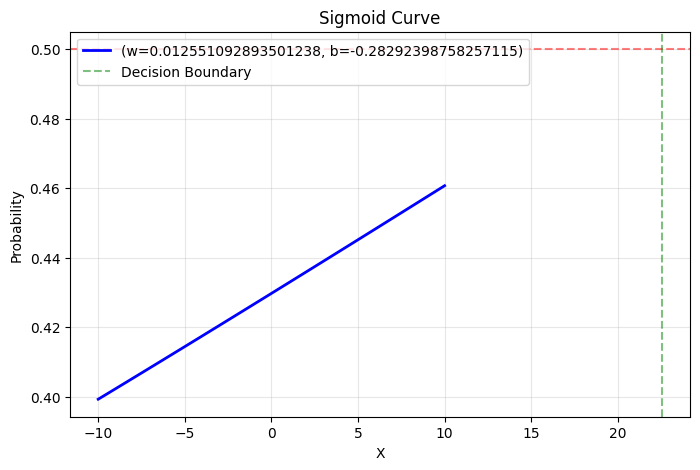

In [13]:
%load_ext autoreload
%autoreload 2
from rubiks.Plotter import *
LogisticPlot(weightLog, biasLog)